In [2]:
from env import VanillaEnv
import numpy as np
import matplotlib.pyplot as plt
import os
import random


c:\Users\manus\miniconda3\envs\master\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\manus\miniconda3\envs\master\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\manus\miniconda3\envs\master\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\manus\miniconda3\envs\master\lib\site-packages\gym\utils\passive_env_chec

Done! Episode Reward:  11.172549019607843
(3, 64, 64)


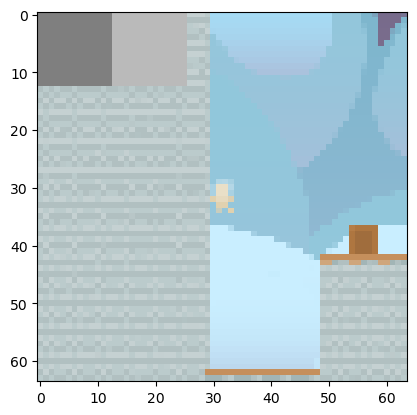

In [3]:
env =  VanillaEnv(start_level=1, num_levels=3)
state = env.reset()
done = False
rewards = []
frames_arr = []
env.seed(1)
np.random.seed(1)
while not done:
    action = np.random.randint(low=0, high=15)
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[5], 0, -1), vmin=0., vmax=1.)
        break

In [5]:
env =  VanillaEnv(start_level=1, num_levels=3, render_mode="human")

0.05764705882352941
0.0584313725490196
0.014509803921568622
-0.00039215686274509667
0.0019607843137254832
0.0027450980392156768
10.002745098039215
Done! Episode Reward:  10.137647058823529
(3, 64, 64)


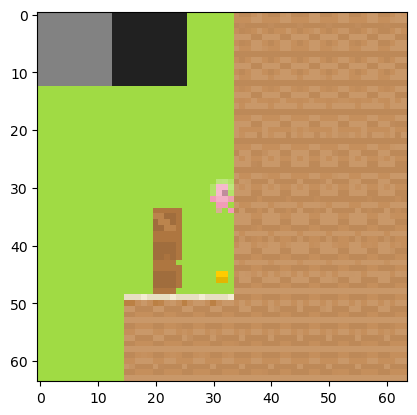

: 

In [24]:

state = env.reset()
done = False
rewards = []
frames_arr = []
env.seed(1)
np.random.seed(1)
for _ in range(20):
    action = 8
    next_state, r, done, info = env.step(action)
    print(r)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[5], 0, -1), vmin=0., vmax=1.)
        break
    